# CMSC320 Final Project: Predicting future rent prices in the DMV (D.C., Maryland, and Virginia) Metropolitan Area

## 3. Data Curation


### Dataset Overview

**URL**: https://www.huduser.gov/portal/datasets/fmr.html

**Purpose**: This dataset from the U.S. Department of Housing and Urban Development (HUD) provides Fair Market Rent (FMR) values, which are used to determine standard payment amounts for housing assistance programs. We are using this dataset to predict future rent prices in the DMV (DC, Maryland, Virginia) Metropolitan Area.

1. **Provides historical rent trends**: The dataset includes FMR data from 2015-2025, allowing us to analyze how rent prices have changed over time in the DMV Metro Area.

2. **Offers zip code level granularity**: The Small Area Fair Market Rents (SAFMRs) provide rent estimates at the zip code level, enabling a detailed geographic analysis of rent variations within the DMV area.

3. **Categorizes by unit size**: The data includes separate rent values for different bedroom counts (0-4 bedrooms), allowing us to analyze trends across different housing types.

4. **Represents standardized values**: These values are calculated using a consistent methodology by HUD, making them reliable for temporal and spatial comparisons and future predictions.

5. **Reflects market conditions**: FMRs are calculated based on actual market survey data, making them representative of real rental housing costs in the region.

6. **Official website of the U.S. Federal Government**: Data provided is trustworthy and accurate as it is provided by the U.S. Federal Government.

This dataset serves as the foundation for our analysis of rent trends and our predictive modeling of future rent prices in the DMV area.

## 4. Exploratory Data Analysis

### Imports

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
import numpy as np
import openpyxl

### Data Preprocessing

In [2]:
dfs = {}

# 1. download small area fmrs from 2015 to 2021
# 2. 2025 - 2022: MODEL DF
# 3. 2021, 2019: Aadi
# 4. 2020: Jay
# 5: 2018 - 2015: Jay

In [3]:
# 2019, 2021
for i in range(2019, 2022):
    if i == 2020:
        continue
    
    df = pd.read_excel(f'datasets/fmrs_{i}.xlsx')
    df = df[df['HUD Metro Fair Market Rent Area Name'] == 'Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area']
    df = df.drop(df.columns[[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17]], axis=1)
    df = df.reset_index(drop=True)
    
    df = df.rename(columns={
            'ZIP\nCode': 'zip_code',
            'SAFMR\n0BR': '0_bedroom',
            'SAFMR\n1BR': '1_bedroom',
            'SAFMR\n2BR': '2_bedroom',
            'SAFMR\n3BR': '3_bedroom',
            'SAFMR\n4BR': '4_bedroom'
        })
    
    df = df[df['zip_code'] != 88888]
    
    dfs[i] = df

In [4]:
for i in range(2022, 2026):
    df = pd.read_excel(f'datasets/fmrs_{i}.xlsx')
    df = df[df['HUD Metro Fair Market Rent Area Name'] == 'Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area']
    df = df.drop(df.columns[[0, 1]], axis=1)
    df = df.reset_index(drop=True)
    
    df = df.rename(columns={
            'ZIP\nCode': 'zip_code',
            'erap_fmr_br0': '0_bedroom',
            'erap_fmr_br1': '1_bedroom',
            'erap_fmr_br2': '2_bedroom',
            'erap_fmr_br3': '3_bedroom',
            'erap_fmr_br4': '4_bedroom'
        })
    
    df = df[df['zip_code'] != 88888]
    
    dfs[i] = df

/Users/Aadi/Desktop/cmsc320 finalrpject/.venv/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/Users/Aadi/Desktop/cmsc320 finalrpject/.venv/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [5]:
df_2020 = pd.read_excel('data/fy2020_safmrs_rev.xlsx')
df_2020

,zcta,CBSASub20,Areaname20,safmr_0br,safmr_0br_90pct_pay_std,safmr_0br_110pct_pay_std,safmr_1br,safmr_1br_90pct_pay_std,safmr_1br_110pct_pay_std,safmr_2br,safmr_2br_90pct_pay_std,safmr_2br_110pct_pay_std,safmr_3br,safmr_3br_90pct_pay_std,safmr_3br_110pct_pay_std,safmr_4br,safmr_4br_90pct_pay_std,safmr_4br_110pct_pay_std
0,76437,METRO10180M10180,"Abilene, TX MSA",540,486,594,560,504,616,740,666,814,960,864,1056,1240,1116,1364
1,76443,METRO10180M10180,"Abilene, TX MSA",540,486,594,560,504,616,740,666,814,960,864,1056,1240,1116,1364
2,76464,METRO10180M10180,"Abilene, TX MSA",540,486,594,560,504,616,740,666,814,960,864,1056,1240,1116,1364
3,76469,METRO10180M10180,"Abilene, TX MSA",550,495,605,580,522,638,760,684,836,1000,900,1100,1290,1161,1419
4,79501,METRO10180M10180,"Abilene, TX MSA",670,603,737,690,621,759,910,819,1001,1200,1080,1320,1540,1386,1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26085,85356,METRO49740M49740,"Yuma, AZ MSA",550,495,605,590,531,649,780,702,858,1130,1017,1243,1370,1233,1507
26086,85364,METRO49740M49740,"Yuma, AZ MSA",600,540,660,650,585,715,860,774,946,1240,1116,1364,1510,1359,1661
26087,85365,METRO49740M49740,"Yuma, AZ MSA",660,594,726,720,648,792,940,846,1034,1360,1224,1496,1650,1485,1815
26088,85366,METRO49740M49740,"Yuma, AZ MSA",570,513,627,620,558,682,820,738,902,1180,1062,1298,1440,1296,1584


In [6]:
df_2020 = df_2020[df_2020['Areaname20'] == 'Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area']
df_2020 = df_2020.rename(columns={
        'zcta' : 'zip_code',
        'safmr_0br': '0_bedroom',
        'safmr_1br': '1_bedroom',
        'safmr_2br': '2_bedroom',
        'safmr_3br': '3_bedroom',
        'safmr_4br': '4_bedroom'
    })
df_2020 = df_2020.drop(['CBSASub20', 'Areaname20', 'safmr_0br_90pct_pay_std', 'safmr_0br_110pct_pay_std','safmr_1br_90pct_pay_std',  'safmr_1br_110pct_pay_std', 'safmr_2br_90pct_pay_std',  'safmr_2br_110pct_pay_std', 'safmr_3br_90pct_pay_std', 'safmr_3br_110pct_pay_std', 'safmr_4br_90pct_pay_std', 'safmr_4br_110pct_pay_std'], axis=1)
df_2020 = df_2020[df_2020['zip_code'] != 88888]
df_2020 = df_2020.reset_index(drop = True)
df_2020
dfs[2020] = df_2020


In [7]:
zip_codes = pd.read_csv('data/zip_code_database.csv')
zip_codes = zip_codes[zip_codes['state'].isin(['MD', 'VA', 'DC'])]
zip_codes 

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
8278,20001,STANDARD,0,Washington,NaN,NaN,DC,District of Columbia,America/New_York,"202, 771",NaN,US,38.91,-77.02,33910
8279,20002,STANDARD,0,Washington,NaN,NaN,DC,District of Columbia,America/New_York,"202, 771",NaN,US,38.91,-76.98,53730
8280,20003,STANDARD,0,Washington,NaN,NaN,DC,District of Columbia,America/New_York,"202, 771",NaN,US,38.88,-76.99,29800
8281,20004,STANDARD,0,Washington,NaN,NaN,DC,District of Columbia,America/New_York,"202, 771",NaN,US,38.90,-77.03,1170
8282,20005,STANDARD,0,Washington,NaN,NaN,DC,District of Columbia,America/New_York,"202, 771",NaN,US,38.90,-77.03,8310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25201,56984,UNIQUE,0,Parcel Return Service,Prs,Parcel Return Svc,DC,NaN,America/New_York,NaN,NaN,US,0.00,0.00,0
25202,56985,UNIQUE,0,Parcel Return Service,Prs,Parcel Return Svc,DC,NaN,America/New_York,NaN,NaN,US,0.00,0.00,0
25203,56998,UNIQUE,0,Parcel Return Service,Prs,Parcel Return Svc,DC,NaN,America/New_York,"202, 771",NaN,US,38.89,-77.03,0
25204,56999,UNIQUE,0,Parcel Return Service,Prs,Parcel Return Svc,DC,NaN,America/New_York,"202, 771",NaN,US,38.89,-77.03,0


In [8]:
df_2018 = pd.read_excel('data/FY18_4050_FMRs_rev.xlsx')
df_2018 = df_2018[df_2018['areaname'] == 'Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area']

zip_codes['county'] = zip_codes['county'].str.strip().str.lower()
df_2018['countyname'] = df_2018['countyname'].str.strip().str.lower()

df_2018 = zip_codes[
    zip_codes['county'].notna() & zip_codes['county'].isin(df_2018['countyname'])
].merge(
    df_2018[['countyname', 'fmr_0', 'fmr_1', 'fmr_2', 'fmr_3', 'fmr_4']],
    left_on='county',
    right_on='countyname',
    how='left'
)[['zip', 'fmr_0', 'fmr_1', 'fmr_2', 'fmr_3', 'fmr_4']]
df_2018 = df_2018.rename(columns={
        'zip' : 'zip_code',
        'fmr_0': '0_bedroom',
        'fmr_1': '1_bedroom',
        'fmr_2': '2_bedroom',
        'fmr_3': '3_bedroom',
        'fmr_4': '4_bedroom'
    })

dfs[2018] = df_2018

In [9]:
df_2017 = pd.read_excel('data/FY2017-4050-County-Level_Data.xlsx')
df_2017 = df_2017[df_2017['areaname'] == 'Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area']

zip_codes['county'] = zip_codes['county'].str.strip().str.lower()
df_2017['countyname'] = df_2017['countyname'].str.strip().str.lower()

df_2017 = zip_codes[
    zip_codes['county'].notna() & zip_codes['county'].isin(df_2017['countyname'])
].merge(
    df_2017[['countyname', 'fmr0', 'fmr1', 'fmr2', 'fmr3', 'fmr4']],
    left_on='county',
    right_on='countyname',
    how='left'
)[['zip', 'fmr0', 'fmr1', 'fmr2', 'fmr3', 'fmr4']]
df_2017 = df_2017.rename(columns={
        'zip' : 'zip_code',
        'fmr0': '0_bedroom',
        'fmr1': '1_bedroom',
        'fmr2': '2_bedroom',
        'fmr3': '3_bedroom',
        'fmr4': '4_bedroom'
    })
dfs[2017] = df_2017

In [10]:
# df_2022 = dfs[2022]
# df_2020 = dfs[2020]

# df_2022 = df_2022[~df_2022['zip_code'].isin(df_2020['zip_code'])]
# df_2022
# zip_codes = zip_codes[zip_codes['zip'].isin(df_2022['zip_code'])]
# zip_codes.to_csv('testzip.csv')

In [11]:
#Used 2020 as reference since it was the most recent year with 443 zip codes. 
df_2020 = dfs[2020]
for df in dfs:
    df_curr = dfs[df]
    df_curr = df_curr[df_curr['zip_code'].isin(df_2020['zip_code'])]
    dfs[df] = df_curr
    print(df)
    display(dfs[df])
    # Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area
    # Washington-Arlington-Alexandria, DC-VA-MD HUD Metro FMR Area

2019


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,1740,1790,2050,2680,3300
1,20002,1220,1260,1440,1880,2320
2,20003,2120,2180,2500,3270,4020
3,20004,2120,2180,2500,3270,4020
4,20005,2000,2050,2350,3070,3780
...,...,...,...,...,...,...
438,22742,1170,1230,1420,1870,2320
439,22960,1170,1230,1420,1870,2320
440,23015,1170,1230,1420,1870,2320
441,23024,1170,1230,1420,1870,2320


2021


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,2080,2130,2430,3120,3780
1,20002,1330,1360,1550,1990,2410
2,20003,2270,2320,2650,3400,4120
3,20004,2270,2320,2650,3400,4120
4,20005,2160,2210,2520,3230,3910
...,...,...,...,...,...,...
500,22742,1130,1160,1320,1690,2050
501,22960,960,1000,1160,1530,1890
502,23015,960,1000,1160,1530,1890
503,23024,960,1000,1160,1530,1890


2022


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,2180,2220,2530,3200,3840
1,20002,1539,1567,1785,2260,2713
2,20003,2310,2350,2680,3390,4070
3,20004,2310,2350,2680,3390,4070
4,20005,2210,2250,2560,3240,3890
...,...,...,...,...,...,...
500,22742,1539,1567,1785,2260,2713
501,22960,1539,1567,1785,2260,2713
502,23015,1539,1567,1785,2260,2713
503,23024,1539,1567,1785,2260,2713


2023


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,2300,2340,2660,3330,3970
1,20002,1589,1615,1838,2299,2742
2,20003,2390,2430,2760,3450,4120
3,20004,2390,2430,2760,3450,4120
4,20005,2200,2240,2550,3190,3800
...,...,...,...,...,...,...
499,22742,1589,1615,1838,2299,2742
500,22960,1589,1615,1838,2299,2742
501,23015,1589,1615,1838,2299,2742
502,23024,1589,1615,1838,2299,2742


2024


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,2460,2500,2840,3530,4190
1,20002,1772,1803,2045,2544,3015
2,20003,2660,2710,3070,3820,4530
3,20004,2610,2650,3010,3740,4440
4,20005,2330,2370,2690,3350,3970
...,...,...,...,...,...,...
500,22742,1772,1803,2045,2544,3015
501,22960,1772,1803,2045,2544,3015
502,23015,1772,1803,2045,2544,3015
503,23024,1772,1803,2045,2544,3015


2025


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,2770,2830,3190,3990,4700
1,20002,2050,2100,2360,2950,3480
2,20003,3020,3080,3470,4340,5120
3,20004,2900,2960,3330,4160,4910
4,20005,2520,2580,2900,3630,4280
...,...,...,...,...,...,...
500,22742,2012,2056,2314,2893,3413
501,22960,2012,2056,2314,2893,3413
502,23015,2012,2056,2314,2893,3413
503,23024,2012,2056,2314,2893,3413


2020


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,1890,1950,2220,2880,3520
1,20002,1280,1320,1500,1950,2380
2,20003,2190,2250,2560,3320,4060
3,20004,2190,2250,2560,3320,4060
4,20005,2070,2130,2430,3150,3850
...,...,...,...,...,...,...
438,22742,1060,1110,1280,1690,2090
439,22960,1060,1110,1280,1690,2090
440,23015,1060,1110,1280,1690,2090
441,23024,1060,1110,1280,1690,2090


2018


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,1504,1561,1793,2353,2902
1,20002,1504,1561,1793,2353,2902
2,20003,1504,1561,1793,2353,2902
3,20004,1504,1561,1793,2353,2902
4,20005,1504,1561,1793,2353,2902
...,...,...,...,...,...,...
736,22712,1504,1561,1793,2353,2902
737,22720,1504,1561,1793,2353,2902
738,22728,1504,1561,1793,2353,2902
739,22734,1504,1561,1793,2353,2902


2017


,zip_code,0_bedroom,1_bedroom,2_bedroom,3_bedroom,4_bedroom
0,20001,1440,1513,1746,2300,2855
1,20002,1440,1513,1746,2300,2855
2,20003,1440,1513,1746,2300,2855
3,20004,1440,1513,1746,2300,2855
4,20005,1440,1513,1746,2300,2855
...,...,...,...,...,...,...
736,22712,1440,1513,1746,2300,2855
737,22720,1440,1513,1746,2300,2855
738,22728,1440,1513,1746,2300,2855
739,22734,1440,1513,1746,2300,2855


### 3 Statistical Methods (Hypothesis Tests)

### Default assumptions
1. $\alpha$ (critical value) = 0.05

### Hypothesis test #1

$H_0:$ There is no difference in average one bedroom rent prices for all the years

$H_a:$ There is a difference in average one bedroom rent prices for at least one of the years

0.0


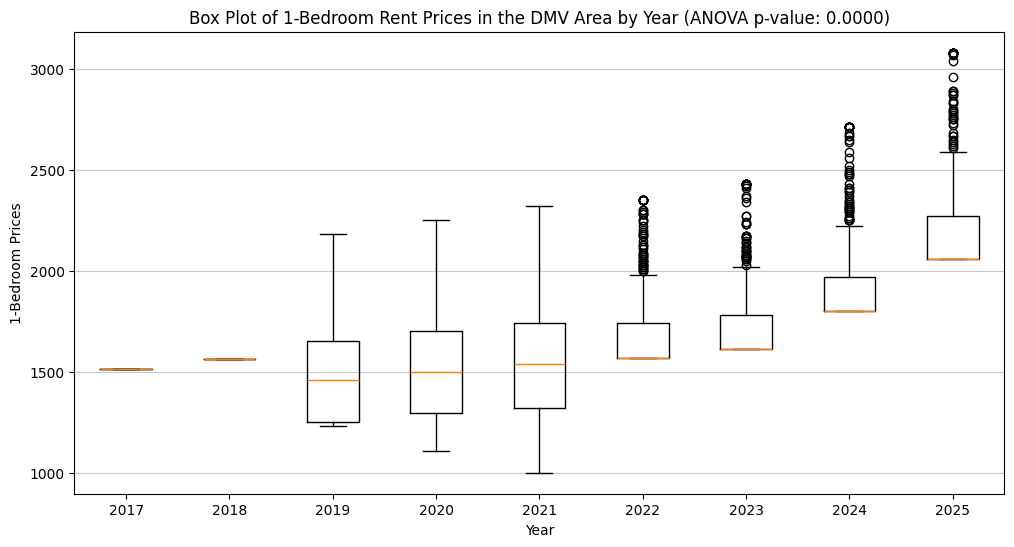

In [12]:
# Test: ANOVA

samples = []

for year in range(2017, 2026):
    df = dfs[year]
    samples.append(df['1_bedroom'])


res = stats.f_oneway(*samples)
pvalue = res.pvalue
print(pvalue)

plt.figure(figsize=(12, 6))
plt.boxplot(samples)
    
plt.xticks(range(1, len(samples) + 1), [f'{year}' for year in range(2017, 2026)])
plt.xlabel('Year')
plt.ylabel('1-Bedroom Prices')
plt.title('Box Plot of 1-Bedroom Rent Prices in the DMV Area by Year (ANOVA p-value: {:.4f})'.format(pvalue))

plt.grid(axis='y', alpha=0.7)
plt.show()

Conclusion: Since the p-value (0.0) < $\alpha$ (0.05), we reject $H_0$. There is enough evidence to suggest that $H_a$ is true, meaning that at least one of the years has a different average one bedroom rent prices compared to all the other years

### Hypothesis test #2

Since from the first test we used ANOVA to conclude there is at least one different group, we can use a Post-Hoc test to find out which group is different

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -48.000     0.068   -97.732     1.732
 (0 - 2)      2.729     1.000   -46.381    51.839
 (0 - 3)    -20.093     0.940   -69.203    29.018
 (0 - 4)    -47.429     0.068   -96.539     1.681
 (0 - 5)   -182.928     0.000  -232.065  -133.790
 (0 - 6)   -226.717     0.000  -275.854  -177.580
 (0 - 7)   -425.226     0.000  -474.364  -376.089
 (0 - 8)   -693.204     0.000  -742.341  -644.066
 (1 - 0)     48.000     0.068    -1.732    97.732
 (1 - 2)     50.729     0.037     1.619    99.839
 (1 - 3)     27.907     0.706   -21.203    77.018
 (1 - 4)      0.571     1.000   -48.539    49.681
 (1 - 5)   -134.928     0.000  -184.065   -85.790
 (1 - 6)   -178.717     0.000  -227.854  -129.580
 (1 - 7)   -377.226     0.000  -426.364  -328.089
 (1 - 8)   -645.204     0.000  -694.341  -596.066
 (2 - 0)     -2.729     1.000   -51.839    46.381
 (2 - 1)    -50.729     0.037   

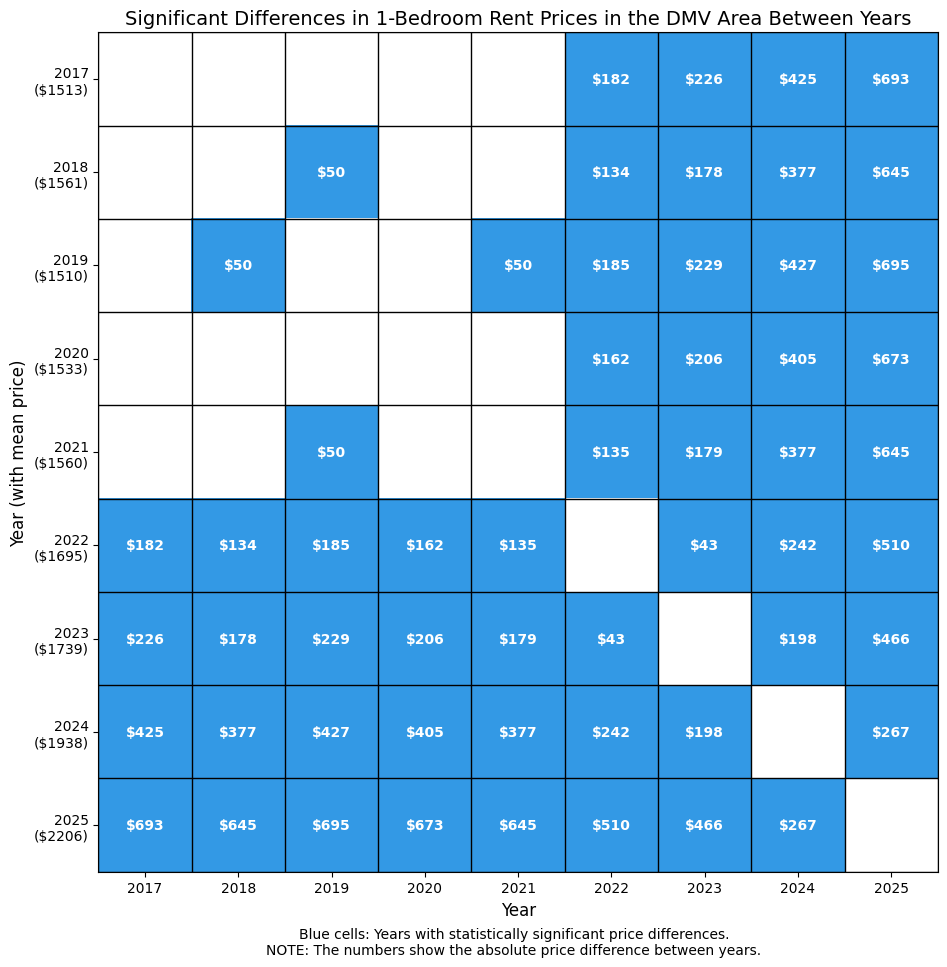

In [13]:
res = stats.tukey_hsd(*samples)

print(res)

years = list(range(2017, 2026))
n_years = len(years)
matrix = np.zeros((n_years, n_years))

pairs = {
    2017: [2022, 2023, 2024, 2025],
    2018: [2019, 2022, 2023, 2024, 2025],
    2019: [2018, 2021, 2022, 2023, 2024, 2025],
    2020: [2022, 2023, 2024, 2025],
    2021: [2019, 2022, 2023, 2024, 2025],
    2022: [2017, 2018, 2019, 2020, 2021, 2023, 2024, 2025],
    2023: [2017, 2018, 2019, 2020, 2021, 2022, 2024, 2025],
    2024: [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2025],
    2025: [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
}

for i, year1 in enumerate(years):
    for year2 in pairs.get(year1, []):
        j = years.index(year2)
        matrix[i, j] = 1

means = [np.mean(sample) for sample in samples]

fig, ax = plt.subplots(figsize=(12, 10))

colors = [(1, 1, 1), (0.2, 0.6, 0.9)]  
cmap = pltcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=2)

im = ax.imshow(matrix, cmap=cmap, vmin=0, vmax=1)

for i in range(n_years + 1):
    ax.axhline(i - 0.5, color='black', linewidth=1)
    ax.axvline(i - 0.5, color='black', linewidth=1)

ax.set_xticks(range(n_years))
ax.set_yticks(range(n_years))
ax.set_xticklabels(years)
ax.set_yticklabels([f"{year}\n(${int(mean)})" for year, mean in zip(years, means)])

for i in range(n_years):
    for j in range(n_years):
        if matrix[i, j] == 1:
            diff = means[i] - means[j]
            diff_text = f"${int(abs(diff))}"
            
            ax.text(j, i, diff_text, ha="center", va="center", color="white" if matrix[i, j] else "black", fontweight='bold')

plt.title("Significant Differences in 1-Bedroom Rent Prices in the DMV Area Between Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Year (with mean price)", fontsize=12)

plt.figtext(0.5, 0.01, 
            "Blue cells: Years with statistically significant price differences.\n"
            "NOTE: The numbers show the absolute price difference between years.", 
            ha="center", fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

Conclusion: Every year has a significant difference in average rent prices for one bedroom apartments in the DMV area compared with all other years. However, the most significant/different years seem to be 2022 - 2025, which makes sense since this was around the time inflation due to COVID-19 impacted the economy (inlcuding rent prices in major metropolitan areas like the DMV)

### Hypothesis test #3

Since 2021 was the year most affected by COVID-19, we can run a Z-test on 2021 Fair Market Rents to compare the sample mean to the population mean. We can take the Fair Market Rents of 1 bedroom since that was the most common layout rented in the DMV. 

In [14]:
df_2021 = dfs[2021]
df_2021_1_bedroom = df_2021['1_bedroom']
df_2021_1_bedroom
pop_sd = df_2021_1_bedroom.std()
sample_mean = df_2021_1_bedroom.mean()
sample_size = len(df_2021_1_bedroom)

$H_0:$ The average Fair Market Rent for a 1-bedroom unit in 2021 is $1560.
(There is no significant difference between the observed mean and $1560.)
μ = 1560

$H_a:$ The average Fair Market Rent for a 1-bedroom unit in 2021 is not $1560.
(There is a significant difference between the observed average and $1560.)
μ ≠ 1560

Z-score: 3.868784001172505
P-value: 0.0001093794835227424


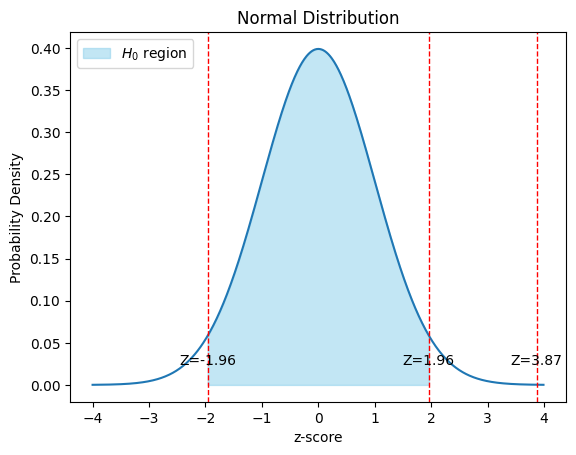

In [15]:
mu = 1500
z_score = (sample_mean - mu) / (pop_sd / np.sqrt(sample_size))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")



ax = plt.subplots(1, 1)
x_axis = np.arange(-4, 4, 0.01)
y_axis = stats.norm.pdf(x_axis, 0, 1)

plt.plot(x_axis, y_axis)

z_marks = [-1.96, 1.96, z_score]
for z in z_marks:
    plt.axvline(x=z, color='r', linestyle='--', linewidth=1)
    plt.text(z, 0.02, f'Z={round(z, 2)}', ha='center', va='bottom')

z_fill_left = -1.96
z_fill_right = 1.96
x_fill = np.linspace(z_fill_left, z_fill_right, 100)
y_fill = stats.norm.pdf(x_fill)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5, label=f'$H_0$ region')
plt.legend()

plt.title('Normal Distribution')
plt.xlabel('z-score')
plt.ylabel('Probability Density')

plt.show()


Conclusion: Since the p-value is less than $\alpha$ 0.05, we reject the null hypothesis. This suggests that the average Fair Market Rent for a 1-bedroom unit in 2021 is significantly different from $1500.